# Imports

In [12]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs

# Dataset

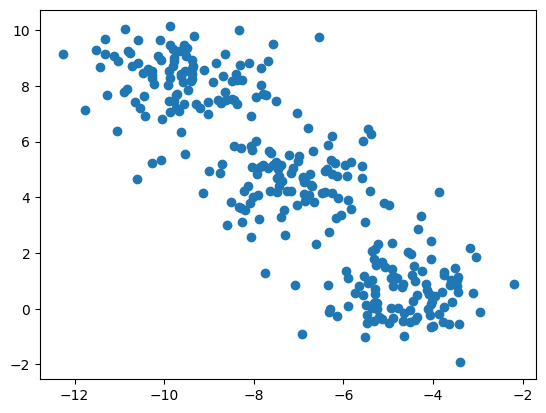

In [16]:
X, y = make_blobs(n_samples=300, cluster_std=1.00, random_state=12)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Calc *best* k

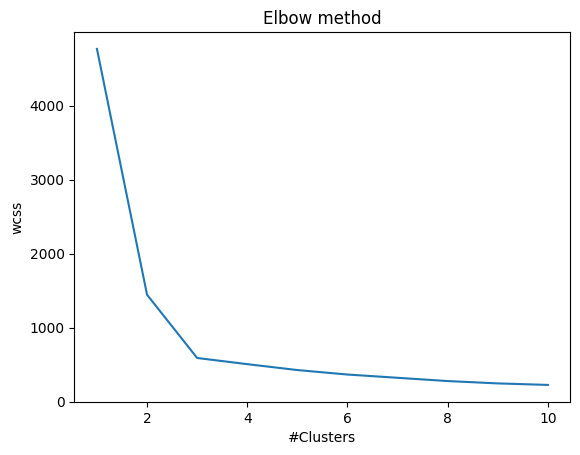

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('#Clusters')
plt.ylabel('wcss')
plt.show()

## run k-means for calculated k

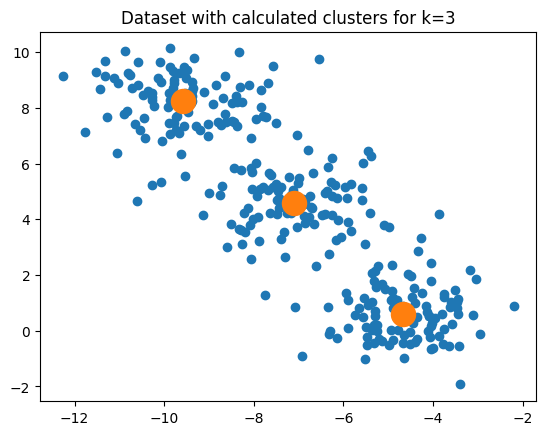

In [29]:
kmeans = KMeans(n_clusters=3)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Dataset with calculated clusters for k=3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300)